### Problem 1)
##### A customer informed their consultant that they have developed several formulations of petrol that gives different characteristics of burning pattern. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. However, a third party certification organisation would like to verify if the formulations are significantly different, and request for both physical and statistical proof. Since the formulations are confidential information, they are not named in the dataset.
##### Please assist the consultant in the area of statistical analysis by doing this:
##### a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.
##### b. A graphical analysis of the additives, including a distribution study.
##### c. A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

# Import packages

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from statsmodels import robust
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import pandas.plotting
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score

# Exploratory Data Analysis

In [2]:
ingredients = pd.read_csv('ingredient.csv')
ingredients.head()
# Each observation/row is a different petrol formulation. Each column measures a specific additive

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [3]:
# Compute the mean of each additive. These are the averages of each additive used to make the formulations
ingredients.mean()

a     1.518365
b    13.407850
c     2.684533
d     1.444907
e    72.650935
f     0.497056
g     8.956963
h     0.175047
i     0.057009
dtype: float64

In [4]:
# Compute the trimmed mean of each additive used to make the formulations
pd.Series(scipy.stats.trim_mean(ingredients, 0.1))

0     1.518012
1    13.376802
2     2.865523
3     1.412209
4    72.707326
5     0.431802
6     8.742151
7     0.033779
8     0.035814
dtype: float64

In [5]:
# Compute the median of each additive used to make the formulations
ingredients.median()

a     1.51768
b    13.30000
c     3.48000
d     1.36000
e    72.79000
f     0.55500
g     8.60000
h     0.00000
i     0.00000
dtype: float64

In [6]:
# a high-level description of the entire dataset. There are 214 distinct formulations, each created by using different amounts of additives
# a to i
ingredients.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [7]:
# Ensure that each variable are indeed numerical
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [8]:
# Compute the standard deviation of each additive
ingredients.std()

a    0.003037
b    0.816604
c    1.442408
d    0.499270
e    0.774546
f    0.652192
g    1.423153
h    0.497219
i    0.097439
dtype: float64

In [9]:
# Compute the interquartile range of each additive
ingredients.quantile(0.75) - ingredients.quantile(0.25)

a    0.002635
b    0.917500
c    1.485000
d    0.440000
e    0.807500
f    0.487500
g    0.932500
h    0.000000
i    0.100000
dtype: float64

In [10]:
# Compute and vizualize the percentiles to summarize the entire distribution
ingredients.quantile([0, 0.25, 0.5, 0.75, 1])

,a,b,c,d,e,f,g,h,i
0.00,1.511150,10.7300,0.000,0.29,69.8100,0.0000,5.4300,0.00,0.00
0.25,1.516522,12.9075,2.115,1.19,72.2800,0.1225,8.2400,0.00,0.00
0.50,1.517680,13.3000,3.480,1.36,72.7900,0.5550,8.6000,0.00,0.00
0.75,1.519157,13.8250,3.600,1.63,73.0875,0.6100,9.1725,0.00,0.10
1.00,1.533930,17.3800,4.490,3.50,75.4100,6.2100,16.1900,3.15,0.51


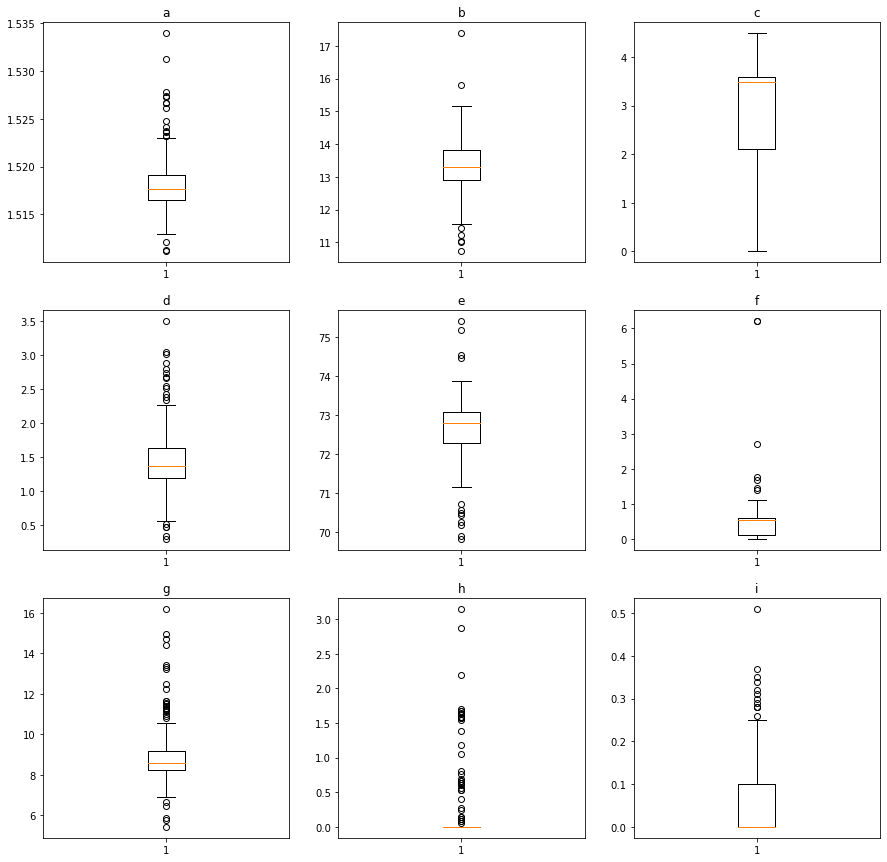

In [11]:
# Boxplots are based on percentiles and give a quick way to visualize the distribution of data.
fig, [(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)] = plt.subplots(3, 3, figsize=(15,15))
ax1.boxplot(ingredients['a'])
ax1.set_title('a')
ax2.boxplot(ingredients['b'])
ax2.set_title('b')
ax3.boxplot(ingredients['c'])
ax3.set_title('c')
ax4.boxplot(ingredients['d'])
ax4.set_title('d')
ax5.boxplot(ingredients['e'])
ax5.set_title('e')
ax6.boxplot(ingredients['f'])
ax6.set_title('f')
ax7.boxplot(ingredients['g'])
ax7.set_title('g')
ax8.boxplot(ingredients['h'])
ax8.set_title('h')
ax9.boxplot(ingredients['i'])
ax9.set_title('i')
plt.show()
# We now get a graphical representation of the computations performed above. There are some additives with many outliers, such as h, and some
# additives with only a few or no outliers, such as c.

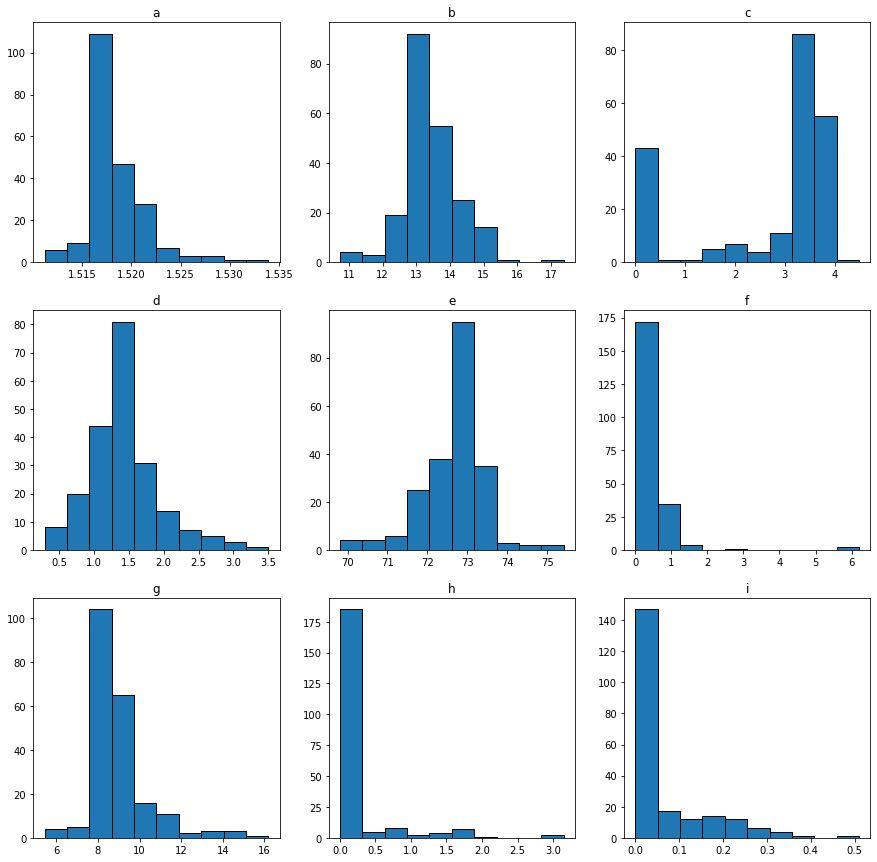

In [12]:
# A histogram is a way to visualize a frequency table, with bins on the x-axis and the data count on the y-axis.
fig, [(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)] = plt.subplots(3, 3, figsize=(15,15))
ax1.hist(ingredients['a'], edgecolor='black')
ax1.set_title('a')
ax2.hist(ingredients['b'], edgecolor='black')
ax2.set_title('b')
ax3.hist(ingredients['c'], edgecolor='black')
ax3.set_title('c')
ax4.hist(ingredients['d'], edgecolor='black')
ax4.set_title('d')
ax5.hist(ingredients['e'], edgecolor='black')
ax5.set_title('e')
ax6.hist(ingredients['f'], edgecolor='black')
ax6.set_title('f')
ax7.hist(ingredients['g'], edgecolor='black')
ax7.set_title('g')
ax8.hist(ingredients['h'], edgecolor='black')
ax8.set_title('h')
ax9.hist(ingredients['i'], edgecolor='black')
ax9.set_title('i')
plt.show()
# We can observe that some additives are closer to a normal distribution, such as additive b, and some are heavily skewed, such as h.

In [13]:
# This shows a correlation matriz. It is a table where the additives are shown on both rows and columns, and the cell values are the correlations
# between the variables.
ingredients.corr()

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


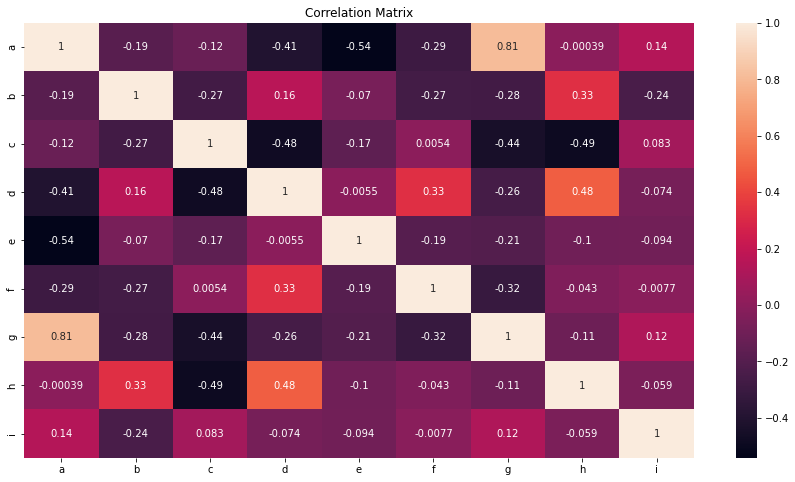

In [14]:
# This shows the correlation matrix again, but with the strength of each correlation represented by the darkness of colour.
plt.figure(figsize=(15,8))
sns.heatmap(ingredients.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()
# We can notice that g and a have a strong possitive correlation

In [15]:
# Check for any missing values
ingredients.isnull().sum()
# There are no missing values

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

# Data Preprocessing

In [16]:
# Feature scaling is done to bring features onto the same scale. In order to do a clustering test, we need the features to be on the same scale.
# If we used a k-nearest neighbors (KNN) algorithm with a Euclidean distance measure, for example, and the features are not on the same scale,
# the computed distances between examples will be dominated by the feature with the largest scale
# We use a standardized scalar to center the feature columns at mean 0 with standard deviation 1 so that the feature columns have the same
# parameters as a standard normal distribution (zero mean and unit variance).
ingredients_scaled = pd.DataFrame(RobustScaler().fit(ingredients).transform(ingredients))
ingredients_scaled.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
ingredients_scaled.head()

,a,b,c,d,e,f,g,h,i
0,-0.125237,-0.305177,0.040404,0.750000,-0.074303,-0.030769,-0.171582,0.00,0.7
1,5.149905,-2.801090,-2.343434,1.681818,-3.690402,0.051282,5.040214,3.15,2.8
2,2.018975,0.010899,0.067340,-1.227273,-0.990712,-0.892308,1.683646,0.00,0.3
3,0.000000,-0.806540,0.026936,0.159091,0.445820,0.030769,-0.064343,0.00,0.0
4,0.170778,0.141689,0.336700,-0.409091,-0.371517,0.051282,-0.482574,0.00,0.0


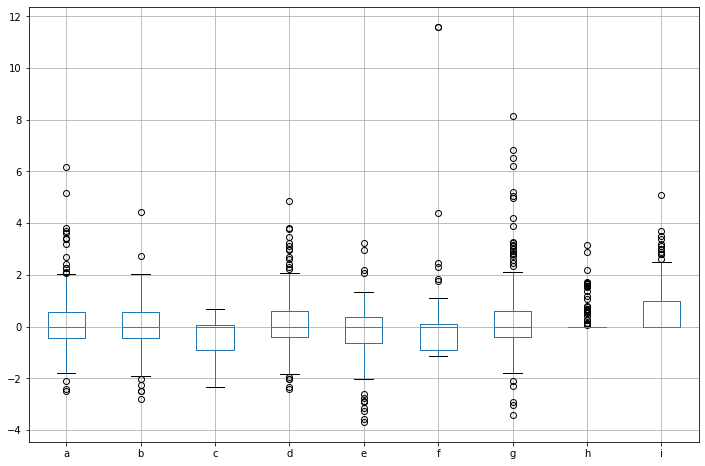

In [17]:
# Plot boxplots again and notice the difference
plt.figure(figsize=(12,8))
ingredients_scaled.boxplot()
plt.show()
# The mean for each is now zero. Note that standardization does not change the shape of the distribution, and it does not transform non-normally
# distributed data into normally distributed data. In addition to scaling data such that it has zero mean and unit variance, standardization
# maintains useful information about outliers

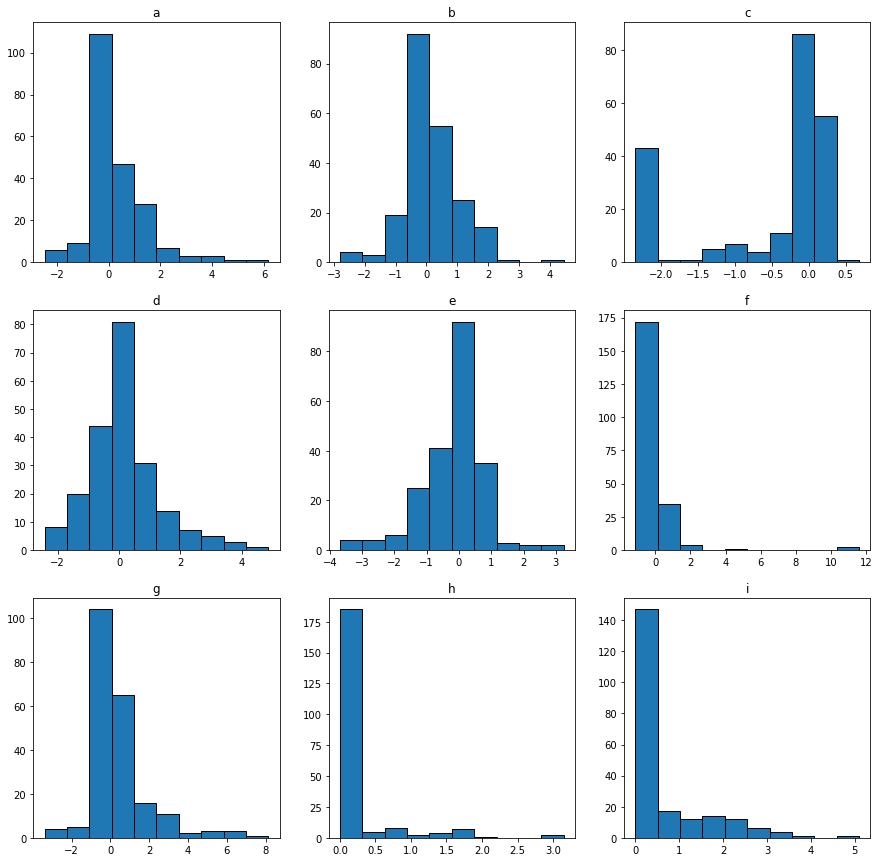

In [18]:
fig, [(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)] = plt.subplots(3, 3, figsize=(15,15))
ax1.hist(ingredients_scaled['a'], edgecolor='black')
ax1.set_title('a')
ax2.hist(ingredients_scaled['b'], edgecolor='black')
ax2.set_title('b')
ax3.hist(ingredients_scaled['c'], edgecolor='black')
ax3.set_title('c')
ax4.hist(ingredients_scaled['d'], edgecolor='black')
ax4.set_title('d')
ax5.hist(ingredients_scaled['e'], edgecolor='black')
ax5.set_title('e')
ax6.hist(ingredients_scaled['f'], edgecolor='black')
ax6.set_title('f')
ax7.hist(ingredients_scaled['g'], edgecolor='black')
ax7.set_title('g')
ax8.hist(ingredients_scaled['h'], edgecolor='black')
ax8.set_title('h')
ax9.hist(ingredients_scaled['i'], edgecolor='black')
ax9.set_title('i')
plt.show()
# As can be seen, standardization does not change the shape of the distribution

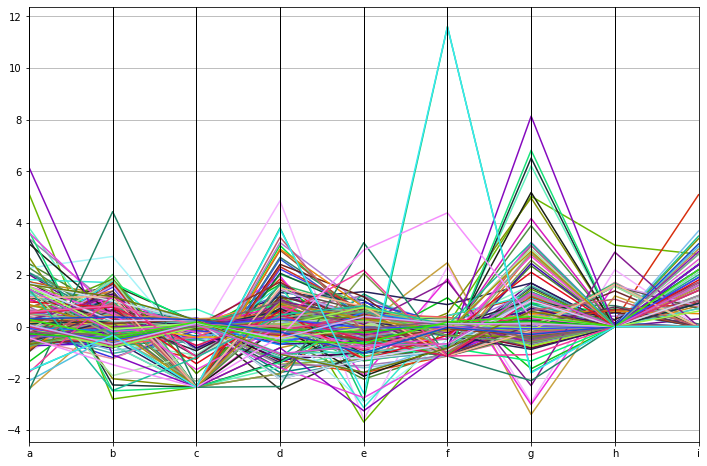

In [19]:
# Do parallel coordinates plotting to visuzalize each formulation. Our goal is to cluster together groups of formulations and attain the number
# of formulations that are significantly distinct from one another
df = ingredients_scaled.copy()
df['index'] = range(214)
plt.figure(figsize=(12,8))
pandas.plotting.parallel_coordinates(df, 'index').get_legend().remove()
plt.show()

# Model Fitting

In [20]:
# I will use a transductive clustering method. A transductive (contrasted with inductive) machine learning method is designed to model a specific
# dataset, but not to apply that model to unseen data. I will not use an inductive method because I just want to model this dataset and not
# do any predictions. I will use ward hierarchical clustering. This algorithm recursively merges pair of clusters that minimizes the variance of
# the clusters being merged.

# The Calinski and Harabasz score is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion. I will
# create numerous ward hierarchical clustering models with a different number of clusters each and compute the Calinski and Harabasz score for
# each model I create. I then choose the best one based on this score.
score_nclusters = []
score_score = []
score = pd.DataFrame()
for n in range(2, 20):
    ward_hierarchical_clustering_model = AgglomerativeClustering(n_clusters=n).fit(ingredients_scaled)
    labels =  ward_hierarchical_clustering_model.labels_
    score_nclusters.append(n)
    score_score.append(calinski_harabasz_score(ingredients_scaled, labels))

score['number of clusters'] = score_nclusters
score['score'] = score_score
score
# The best model is the model with number of clusters = 8. I conclude that there are 8 distinct clusters.

,number of clusters,score
0,2,50.013335
1,3,54.432510
2,4,61.122256
3,5,63.700213
4,6,65.761070
5,7,67.198507
6,8,68.580420
7,9,67.011208
8,10,65.610030
9,11,65.328693


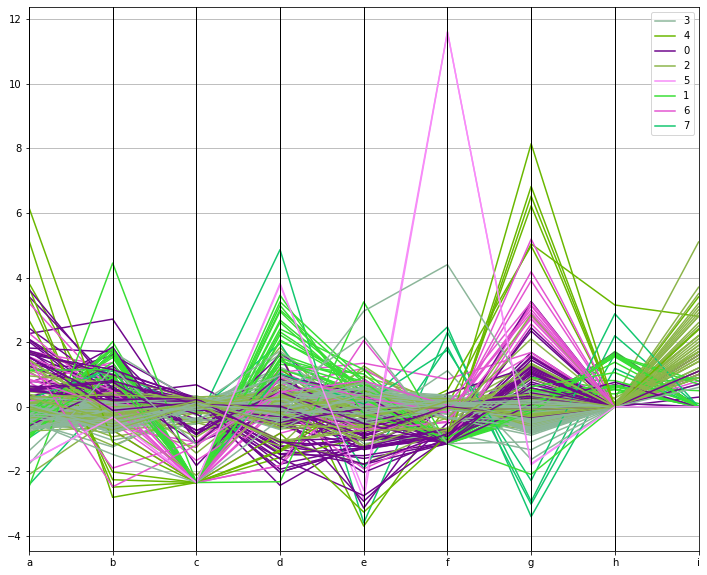

In [21]:
# Plot the parallel coordinates showing the 8 different clusters
df = ingredients_scaled.copy()
df['cluster'] = AgglomerativeClustering(n_clusters=8).fit(ingredients_scaled).labels_
plt.figure(figsize=(12,10))
pandas.plotting.parallel_coordinates(df, 'cluster')
plt.show()